In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def df_description(df):
    """ df_description: returns a briefly description of the variables in a dataframe
        input: 
            - df : dataframe
        output:
            - None (prints information on the terminal)
    """
    display(df.head().T)

    print('\n\n Dataframe info: \n')
    display(df.info(verbose=True))

    print('\n\n Dataframe description: ')
    display(df.describe(include='all').T)  
    return None


def df_nulls(df):
    """ df_nulls: returns the columns with nulls, and the number of columns in each column
        input:
            - df : dataframe
        output:
            - None (prints information on the terminal)
    """
    print('Columns with nulls: \n')
    display(df.isnull().any())

    print('\n \n Number of nulls in each column:')
    display(df.isnull().sum())

    return None 

## Commercial actitivity

El dataset 'commercial activity' tiene las siguientes variables:
- **pk_cid** (int64)

    Identificador de cliente
- **pk_partition** (object : date)

    Fecha de ingesta de los datos. Existen 17 particiones o históricos.
- **entry_date** (object : date)

    Fecha en la que realizó la primera contratación a través de easyMoney
- **entry_channel** (object : category)

    Canal de captación del cliente. Existen 69 canales diferentes. 
- **active_customer** (float64 : bool)

    Indicador de actividad del cliente en nuestra aplicación
- **segment** (object : category)

    Segmento comercial del cliente. Existen 3 segmentos: '01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'

In [3]:
dir_path = '/content/drive/MyDrive/Nuclio Data Science - Proyecto Final/data/'
dir_path = '/Users/carlosperezricardo/Documents/data/'

commercial = pd.read_csv(dir_path+'commercial_activity_df.csv', encoding='utf-8')
commercial.drop(columns=['Unnamed: 0'], inplace=True)

df_description(commercial)

,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
entry_date,2018-01-12,2015-08-10,2015-08-10,2015-08-10,2015-08-10
entry_channel,KHL,KHE,KHE,KHD,KHE
active_customer,1,0,0,0,1
segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


None



 Dataframe description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,5.96292e+06,NaN,NaN,NaN,1.23493e+06,162302,15891,1.11253e+06,1.2311e+06,1.35234e+06,1.55369e+06
pk_partition,5962924,17,2019-05-28,442995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry_date,5962924,1499,2017-07-28,57389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry_channel,5829891,68,KHE,3113947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_customer,5.96292e+06,NaN,NaN,NaN,0.403384,0.490577,0,0,0,1,1
segment,5828980,3,03 - UNIVERSITARIO,3900166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_nulls(commercial)

Columns with nulls: 



pk_cid             False
pk_partition       False
entry_date         False
entry_channel       True
active_customer    False
segment             True
dtype: bool


 
 Number of nulls in each column:


pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

## **Altas de clientes**

En el dataset *commercial* existe el campo *entry_date*. Sin embargo, nos preguntamos si este campo indica la fecha en que el cliente se dio de alta en la base de datos o cuando compró su primer producto. 

In [6]:
products = pd.read_csv(dir_path+'products_df.csv', encoding='utf-8')
products.drop(columns=['Unnamed: 0'], inplace=True)

commercial_products = pd.merge(commercial, products, on=['pk_cid','pk_partition'], how='left')
commercial_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     float64
 5   segment             object 
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  em_account_pp       int64  
 13  credit_card         int64  
 14  payroll             float64
 15  pension_plan        float64
 16  payroll_account     int64  
 17  emc_account         int64  
 18  debit_card          int64  
 19  em_account_p        int64  
 20  em_acount           int64  
dtypes: float64(3), int64(14), object(4)
memory usage: 1000.9+ MB


In [7]:
from datetime import datetime as dt
# 2015-02-29 = esta fecha no existe!

wrong_dates = {'2015-02-29': '2015-02-28', '2019-02-29':'2019-02-28'}

commercial_products['entry_date'] = commercial_products['entry_date'].replace(wrong_dates)
commercial_products['entry_date'] = pd.to_datetime(commercial_products['entry_date'], format='%Y-%m-%d')

commercial_products['pk_partition'] = commercial_products['pk_partition'].replace(wrong_dates)
commercial_products['pk_partition'] = pd.to_datetime(commercial_products['pk_partition'], format='%Y-%m-%d')

Igual que como se hizo en el EDA de products, se convierten las variables que indican los productos como boolean para ahorrar espacio en memoria. 

In [8]:
# Codificar variables logicas (1/0 = bool)
from sys import getsizeof

boolean_cols = ["short_term_deposit", "loans", "mortgage", "funds", "securities", "long_term_deposit", "em_account_pp", "credit_card", "payroll_account", "emc_account", "debit_card", "em_account_p", "em_acount", "payroll", "pension_plan"] 
# payroll y pension_plan tienen nulos en el dataset completo

print('El dataframe products ocupa {} MB antes de codificar columnas boolean'.format(getsizeof(commercial_products)/1048576))

for x in boolean_cols:
    commercial_products[x] = commercial_products[x].astype(bool)

print('El dataframe products_df ocupa {} MB después de codificar columnas boolean'.format(getsizeof(commercial_products)/1048576))

El dataframe products ocupa 1665.847601890564 MB antes de codificar columnas boolean
El dataframe products_df ocupa 1068.7454175949097 MB después de codificar columnas boolean


In [9]:
commercial_products.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


El siguiente paso es hacer un subset del primer registro que existe por cliente con el objetivo de poder observar si el cliente compró un producto en su primer mes. 

In [10]:
commercial_products_sorted = commercial_products.sort_values(by=['pk_cid', 'pk_partition'])

In [11]:
initial_commercial_products = commercial_products_sorted.groupby(['pk_cid']).first()
initial_commercial_products.head()

,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
pk_cid,,,,,,,,,,,,,,,,,,,,
15891,2018-07-28,2018-07-28,KAT,1.0,02 - PARTICULARES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
16063,2018-11-28,2018-11-19,KAT,1.0,02 - PARTICULARES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16203,2018-12-28,2018-12-23,KAT,0.0,02 - PARTICULARES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16502,2018-09-28,2018-09-30,KHN,0.0,02 - PARTICULARES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17457,2018-01-28,2017-09-16,KAT,1.0,02 - PARTICULARES,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [12]:
list_products = ["short_term_deposit", "loans", "mortgage", "funds", "securities", "long_term_deposit", "em_account_pp", "credit_card", "payroll_account", "emc_account", "debit_card", "em_account_p", "em_acount"]

initial_commercial_products['buy'] = initial_commercial_products[list_products].sum(axis=1)

initial_commercial_products.head()

,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,...,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,buy
pk_cid,,,,,,,,,,,,,,,,,,,,,
15891,2018-07-28,2018-07-28,KAT,1.0,02 - PARTICULARES,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
16063,2018-11-28,2018-11-19,KAT,1.0,02 - PARTICULARES,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
16203,2018-12-28,2018-12-23,KAT,0.0,02 - PARTICULARES,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
16502,2018-09-28,2018-09-30,KHN,0.0,02 - PARTICULARES,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
17457,2018-01-28,2017-09-16,KAT,1.0,02 - PARTICULARES,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2


In [13]:
initial_commercial_products['buy'].value_counts().sort_index()

0    127814
1    290845
2     30122
3      5818
4      1468
5       259
6        44
7         3
Name: buy, dtype: int64

Hay muchos clientes que en el primer mes en que aparecen no se dan de alta en ningún producto. Veamos si estos clientes corresponden a clientes que ya existían con anterioridad a las 17 particiones y se dieron de baja mucho antes.

In [14]:
first_partition = '2018-01-28'
no_buyers = initial_commercial_products [ (initial_commercial_products['pk_partition'] == first_partition) & (initial_commercial_products['buy'] == 0) ]
no_buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4473 entries, 18956 to 1379131
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   pk_partition        4473 non-null   datetime64[ns]
 1   entry_date          4473 non-null   datetime64[ns]
 2   entry_channel       4473 non-null   object        
 3   active_customer     4473 non-null   float64       
 4   segment             4473 non-null   object        
 5   short_term_deposit  4473 non-null   bool          
 6   loans               4473 non-null   bool          
 7   mortgage            4473 non-null   bool          
 8   funds               4473 non-null   bool          
 9   securities          4473 non-null   bool          
 10  long_term_deposit   4473 non-null   bool          
 11  em_account_pp       4473 non-null   bool          
 12  credit_card         4473 non-null   bool          
 13  payroll             4473 non-null   bool 

Tan sólo son 4.473 clientes de 127.814 aparecen en la primera partición sin ninguna compra. Por lo que habrá que considerar y especificar que se considera como alta de cliente. 

La siguiente pregunta es si existen clientes que no han comprado ningún producto en ninguno de los históricos. 

In [15]:
no_buyers = commercial_products_sorted.groupby('pk_cid')[list_products].sum()
no_buyers = no_buyers.sum(axis='columns')
no_buyers = no_buyers[no_buyers == 0]
len(no_buyers)

106056

In [16]:
len(commercial_products_sorted['pk_cid'].unique())

456373

In [17]:
len(no_buyers)/len(commercial_products_sorted['pk_cid'].unique())*100

23.2388857360098

Más del 23% (106.056) de los clientes que existen en nuesta base de datos no han contratado ningún producto que se ofrece. Sin embargo como se indicaba anteriormente 127.814 no tenían contratado ningún producto en el primer mes en el que aparecen en nuestra base de datos. 

Este hecho nos permite afirmar que algunos de los clientes (106.506) corresponden a clientes que se dieron de baja (por lo que probablemente algún día se dieron de alta) mucho antes de la primera partición.

array([[<AxesSubplot:title={'center':'diferencia'}>]], dtype=object)

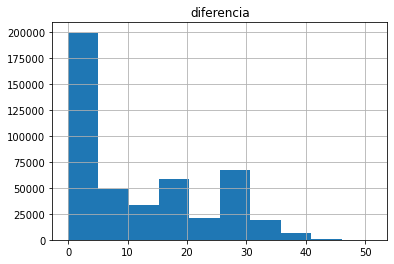

In [18]:
initial_commercial_products['pk_partition'] = pd.to_datetime(initial_commercial_products['pk_partition'])
initial_commercial_products['entry_date'] = pd.to_datetime(initial_commercial_products['entry_date'])
initial_commercial_products['diferencia'] = (initial_commercial_products['pk_partition'] - initial_commercial_products['entry_date'])/np.timedelta64(1, 'M')
#round((prod_df['pk_partition'] - prod_df[prev_date])/np.timedelta64(1, 'M'))
#initial_commercial_products['diferencia']
initial_commercial_products.hist(column='diferencia')

In [19]:
initial_commercial_products['diferencia'].describe()

count    456373.000000
mean         11.738590
std          11.572861
min          -0.098565
25%           0.689953
50%           7.392349
75%          20.632867
max          51.155055
Name: diferencia, dtype: float64

In [20]:
initial_commercial_products['entry_month'] = initial_commercial_products['entry_date'].dt.month
initial_commercial_products['entry_year'] = initial_commercial_products['entry_date'].dt.year 

year_month_df = initial_commercial_products.groupby(['entry_year','entry_month']).count().reset_index()

year_month_df['entry_year_month'] = year_month_df['entry_year'].astype(str) +'-'+ year_month_df['entry_month'].astype(str)

year_month_df

,entry_year,entry_month,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,buy,diferencia,entry_year_month
0,2015,1,1961,1961,1957,1961,1957,1961,1961,1961,...,1961,1961,1961,1961,1961,1961,1961,1961,1961,2015-1
1,2015,2,2034,2034,2033,2034,2033,2034,2034,2034,...,2034,2034,2034,2034,2034,2034,2034,2034,2034,2015-2
2,2015,3,2343,2343,2340,2343,2340,2343,2343,2343,...,2343,2343,2343,2343,2343,2343,2343,2343,2343,2015-3
3,2015,4,2368,2368,2366,2368,2365,2368,2368,2368,...,2368,2368,2368,2368,2368,2368,2368,2368,2368,2015-4
4,2015,5,2634,2634,2631,2634,2628,2634,2634,2634,...,2634,2634,2634,2634,2634,2634,2634,2634,2634,2015-5
5,2015,6,2147,2147,2146,2147,2146,2147,2147,2147,...,2147,2147,2147,2147,2147,2147,2147,2147,2147,2015-6
6,2015,7,13541,13541,13535,13541,13534,13541,13541,13541,...,13541,13541,13541,13541,13541,13541,13541,13541,13541,2015-7
7,2015,8,13785,13785,13780,13785,13780,13785,13785,13785,...,13785,13785,13785,13785,13785,13785,13785,13785,13785,2015-8
8,2015,9,13432,13432,13429,13432,13429,13432,13432,13432,...,13432,13432,13432,13432,13432,13432,13432,13432,13432,2015-9
9,2015,10,19412,19412,19401,19412,19400,19412,19412,19412,...,19412,19412,19412,19412,19412,19412,19412,19412,19412,2015-10


<ipython-input-22-2d832a266f96>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


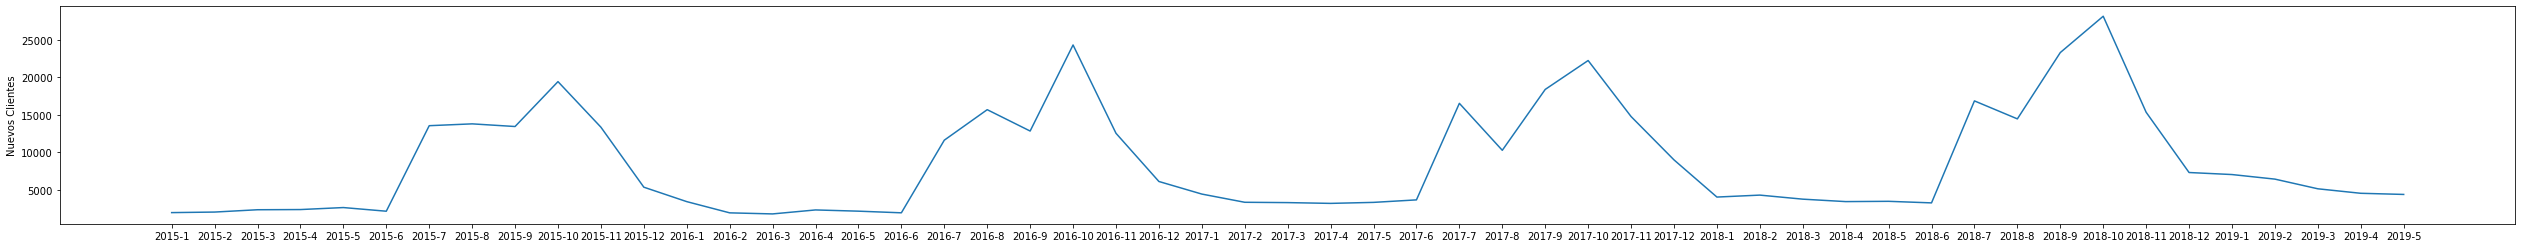

In [22]:
fig, ax = plt.subplots(figsize=(44,4))
ax.plot(year_month_df['entry_year_month'], year_month_df['pk_partition'] )
ax.set_ylabel('Nuevos Clientes')
fig.show()

In [77]:
#savefig('evolucion.png')
fig.savefig('evolucion.png', dpi=fig.dpi)

In [43]:
products_dict = {"short_term_deposit":"ahorro e inversión", "loans":"financiación", "mortgage":"financiación", 
    "funds":"ahorro e inversión", "securities":"ahorro e inversión", "long_term_deposit":"ahorro e inversión", 
    "em_account_pp":"cuenta", "credit_card":"financiación", "payroll_account":"cuenta", 
    "emc_account":"cuenta", "debit_card":"financiación", "em_account_p":"cuenta", "em_acount":"cuenta"}

cost_product = {'cuenta':10, 'ahorro e inversión':40, 'financiación':60}
ingresos_list = []

for key, value in products_dict.items():
    new_key = key+'_ingresos'
    initial_commercial_products[key] = initial_commercial_products[key]*cost_product[value]
    ingresos_list.append(new_key)

primeros_ingresos = pd.DataFrame((initial_commercial_products[ingresos_list] != 0).astype(int).sum(axis=0))
primeros_ingresos.columns = ['count']

primeros_ingresos['ingresos'] = initial_commercial_products[ingresos_list].sum(axis=0)

print('Ingresos medios por cliente (en su primera compra): {} '.format(primeros_ingresos['ingresos'].sum() / primeros_ingresos['count'].sum()))

Ingresos medios por cliente (en su primera compra): 14.728972459740156 


In [68]:
first_buy = pd.DataFrame( initial_commercial_products[ingresos_list].sum(axis=1)[:] )
first_buy.columns = ['ingresos']
first_buy['pk_partition'] = initial_commercial_products['pk_partition']

first_partition = '2018-01-28'
first_buy = first_buy[ (first_buy['ingresos'] != 0) & (first_buy['pk_partition'] != first_partition)]
first_buy.head()

,ingresos,pk_partition
pk_cid,,
15891,10,2018-07-28
17980,80,2018-05-28
21719,10,2018-04-28
22635,10,2019-02-28
22648,10,2018-05-28


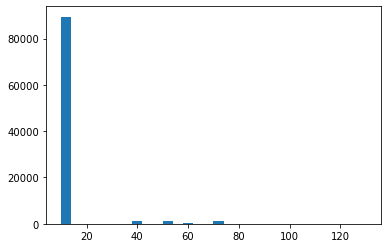

In [69]:
plt.hist( first_buy['ingresos'], bins=30)
plt.show()

In [70]:
first_buy['ingresos'].describe()

count    93539.000000
mean        11.913640
std          9.405822
min         10.000000
25%         10.000000
50%         10.000000
75%         10.000000
max        130.000000
Name: ingresos, dtype: float64

In [82]:
first_buy_partition = first_buy.groupby('pk_partition').agg(['count','sum']).reset_index()
first_buy_partition.columns = ['pk_partition', 'totales', 'ingresos_totales']
first_buy_partition = first_buy_partition.sort_values('pk_partition')
first_buy_partition

,pk_partition,totales,ingresos_totales
0,2018-02-28,3614,58030
1,2018-03-28,3232,51810
2,2018-04-28,2808,43070
3,2018-05-28,2872,42530
4,2018-06-28,2695,42270
5,2018-07-28,12318,141170
6,2018-08-28,10834,119720
7,2018-09-28,15849,172210
8,2018-10-28,16016,172040
9,2018-11-28,8312,90020


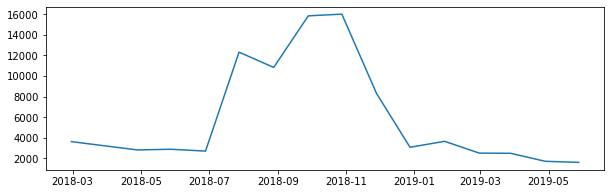

In [83]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot( first_buy_partition['pk_partition'], first_buy_partition['totales'] )
plt.show()

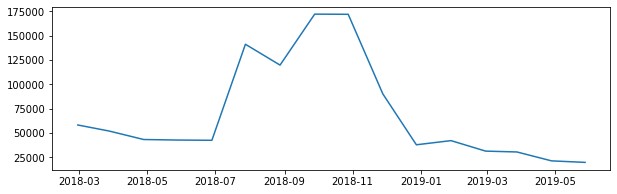

In [84]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot( first_buy_partition['pk_partition'], first_buy_partition['ingresos_totales'] )
plt.show()

In [ ]:
def tipos_producto(df, products_dict):
  ahorros = df.copy(deep=True)
  financiacion = df.copy(deep=True)
  cuentas = df.copy(deep=True)

  for key, value in products_dict.items():
    if value == 'ahorro e inversión':
      ahorros[key] = df[key]
    else:
      ahorros.drop(columns=key, inplace=True)
    if value == "financiación":
      financiacion[key] = df[key]
    else:
      financiacion.drop(columns=key, inplace=True)
    if value == "cuenta":
      cuentas[key] = df[key]
    else:
      cuentas.drop(columns=key, inplace=True)

  return ahorros, financiacion, cuentas

inicio_ahorros, inicio_financiacion, inicio_cuentas

In [ ]:
#

In [5]:
partitions = commericial['pk_partition'].unique()
partitions = sorted(partitions)
display(partitions)

print("Se tienen {} particiones".format(len(partitions)))

['2018-01-28',
 '2018-02-28',
 '2018-03-28',
 '2018-04-28',
 '2018-05-28',
 '2018-06-28',
 '2018-07-28',
 '2018-08-28',
 '2018-09-28',
 '2018-10-28',
 '2018-11-28',
 '2018-12-28',
 '2019-01-28',
 '2019-02-28',
 '2019-03-28',
 '2019-04-28',
 '2019-05-28']

Se tienen 17 particiones


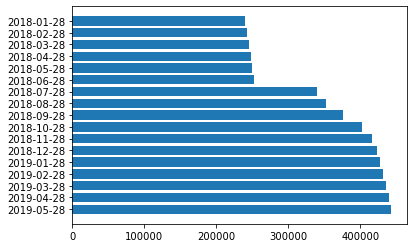

In [16]:
partitions_valuecounts = commercial_activity_all['pk_partition'].value_counts()

fig, ax = plt.subplots()
ax.barh(partitions_valuecounts.index, partitions_valuecounts[:])
plt.show()

Como se indica en el correo de John, el dataset incluye 17 particiones o históricos (*pk_partition*). Como se puede observar el número de filas o *entries* en cada partición va aumentado con el transcurso de los meses. Se espera que la última partición contenga todos los datos de las particiones anteriores (esta suposición se comprobará), y para el EDA (Exploratory Data Analysis) se trabajará con esta partición, dado que el dataset entero contiene datos duplicados.

Como se puede observar en las siguientes tablas la última partición tiene 442.995 *entries* o filas. 

In [17]:
commercial_activity_df = commercial_activity_all[  commercial_activity_all['pk_partition'] == partitions[-1]]
df_description(commercial_activity_df)
del commercial_activity_all

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
12715896,657826,2019-05-28,2015-05-24,013,1.0,02 - PARTICULARES
12715899,657817,2019-05-28,2019-05-12,NaN,0.0,NaN
12715982,657986,2019-05-28,2016-02-18,KAF,1.0,02 - PARTICULARES
12716026,657905,2019-05-28,2017-02-07,KAT,1.0,01 - TOP
12716082,657336,2019-05-28,2019-03-28,KAT,1.0,02 - PARTICULARES




 Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442995 entries, 12715896 to 13647308
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   pk_cid           442995 non-null  int64  
 1   pk_partition     442995 non-null  object 
 2   entry_date       442995 non-null  object 
 3   entry_channel    438486 non-null  object 
 4   active_customer  442995 non-null  float64
 5   segment          438379 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.7+ MB


None



 Dataframe description: 


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
count,4.429950e+05,442995,442995,438486,442995.000000,438379
unique,NaN,1,1495,65,NaN,3
top,NaN,2019-05-28,2017-07-28,KHE,NaN,03 - UNIVERSITARIO
freq,NaN,442995,3422,194727,NaN,284236
mean,1.271885e+06,NaN,NaN,NaN,0.387291,NaN
std,1.779574e+05,NaN,NaN,NaN,0.487132,NaN
min,1.606300e+04,NaN,NaN,NaN,0.000000,NaN
25%,1.141604e+06,NaN,NaN,NaN,0.000000,NaN
50%,1.280164e+06,NaN,NaN,NaN,0.000000,NaN
75%,1.419056e+06,NaN,NaN,NaN,1.000000,NaN


En las siguientes figuras, se comprueban los valores nulos en el dataframe *commercial_activity_df*. Se puede observar en la última figura que los valores nulos que aparecen en *entry_channel* y *segment* ocurren en la mayoría de casos en ambos campos a la vez. 

Los valores nulos, 4616 en el peor de los casos sobre 442995, lo que corresponde alrededor del 1% de las filas del dataframe, por lo que descartar estas filas tampoco supondrá un cambio muy drástico en los futuros resultados. 

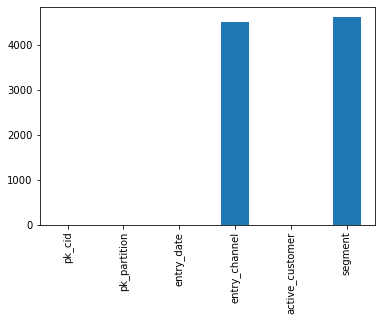

pk_cid                0
pk_partition          0
entry_date            0
entry_channel      4509
active_customer       0
segment            4616
dtype: int64

In [18]:
# Obtener los NaNs en cada columna
commercial_activity_df.isna().sum().plot( kind="bar" )
plt.show()
display(commercial_activity_df.isna().sum())

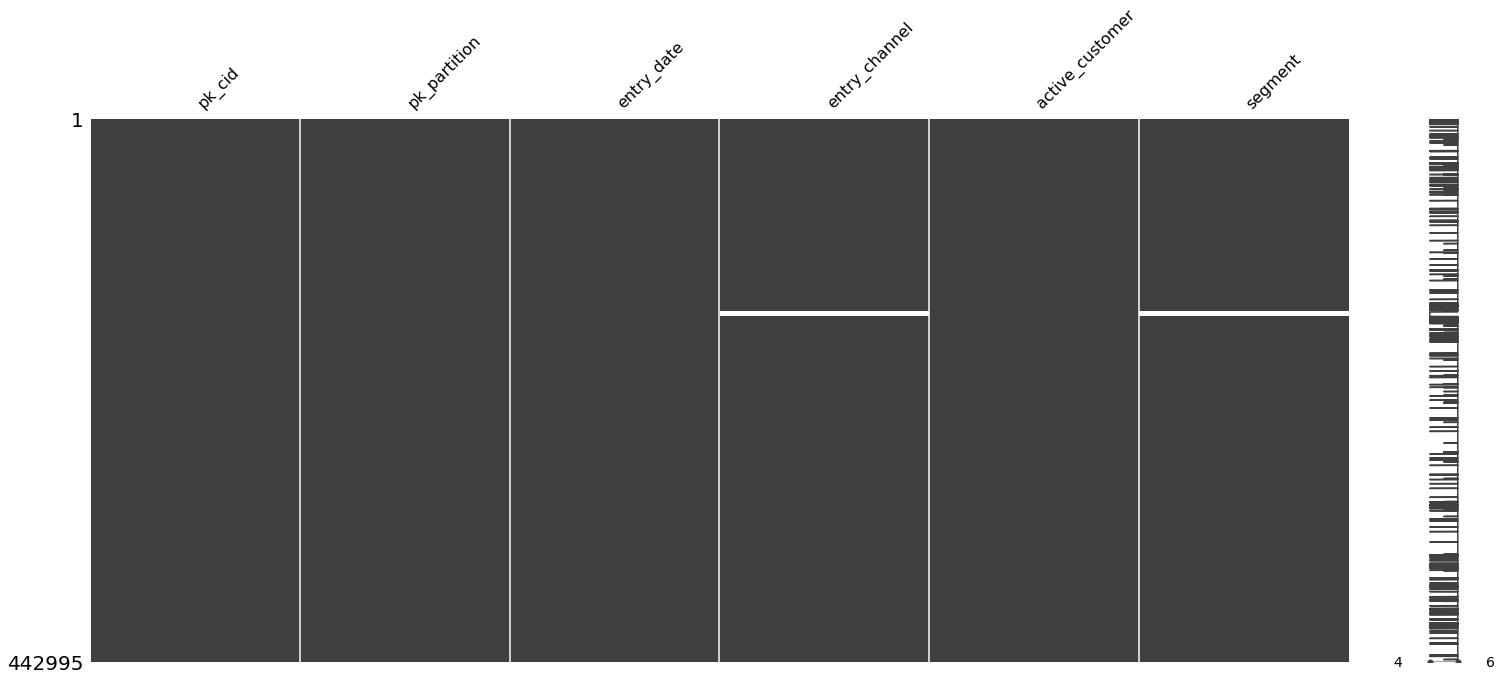

In [19]:
import missingno as msno 
  
# Visualize missing values as a matrix 
msno.matrix(commercial_activity_df) 
plt.show()

### Preprocessing

En esta parte se realizará una limpieza de los datos. Los pasos a seguir son los siguientes:

La información se conserva entre las particiones, pero puede hacer algunas discrepancias entre las particiones, y algunos datos pueden haber sido alterados. 
- Pasar la variable *entry_channel* y *segment* a category
    - Mirar que category es más predominante
- Pasar las variables *pk_partition* y *entry_date* a 'date'
    - Añadir variables de año, mes, dia, dia de la semana, año-mes

#### Comprobar si existen discrepancias entre particiones

En este apartado se comprobará que no existe duplicidad de las filas entre las particiones. El proceso para comprobar si existen duplicados se puede comprobar si:
- Si tan sólo aparece una fila para cada combincación de pk_cid, entry_date, entry_channel

https://appdividend.com/2020/03/07/python-pandas-find-duplicate-rows-in-dataframe-based-on-all-or-selected-columns/#:~:text=If%20you%20want%20to%20find,duplicated()%20function.

In [20]:
first_partition = commercial_activity_df[(commercial_activity_df['pk_partition']=='2018-01-28')]

print(first_partition.shape)

second_partition = commercial_activity_df[(commercial_activity_df['pk_partition']=='2018-02-28')] 
print(second_partition.shape)

first_two_partitions = pd.merge(first_partition, second_partition, on=['pk_cid', 'entry_date', 'entry_channel', 'segment'], how='outer', suffixes=['_1','_2'])

print(first_two_partitions.shape)

new_clients = first_two_partitions[ first_two_partitions['pk_partition_1'].isna() ] 
first_two_partitions = first_two_partitions.drop(index=new_clients.index)

print(first_two_partitions.shape)

(0, 6)
(0, 6)
(0, 8)
(0, 8)


#### Limpieza de categorías 

En este paso se codificarán las variables *entry_channel* y *segment* como category. Para ello primero se codifican los NaNs como 'Sin asignar'.

Pasar de object a category se consigue reducir el tamaño en la memoria del dataframe y simplificar el dataset en caso de que se desee realizar un one-line-enconding, por ejemplo.

In [21]:
commercial_activity_df['entry_channel'] = commercial_activity_df['entry_channel'].fillna('Sin Asignar')
commercial_activity_df['segment'] = commercial_activity_df['segment'].fillna('Sin Asignar')

In [22]:
# Obtener categorias entry_channel 
entry_channel_cats = commercial_activity_df['entry_channel'].unique()
display(entry_channel_cats)

print("Numero de categorias 'entry_channel': {}".format(entry_channel_cats.shape[0]))

array(['013', 'Sin Asignar', 'KAF', 'KAT', 'KFC', 'KHN', 'KHL', 'KHK',
       'KHM', 'KHE', 'KFA', 'KAR', '007', 'RED', 'KHC', 'KAA', 'KAG',
       'KCH', 'KHQ', 'KHO', 'KAZ', 'KAQ', 'KAJ', 'KAW', 'KBG', 'KAY',
       'KFD', 'KBH', 'KAE', 'KBY', 'KHD', 'KAM', 'KBZ', 'KCI', 'KAB',
       'KFL', 'KFP', 'KFS', 'KAH', 'KFF', 'KGX', 'KAS', 'KBE', 'KBU',
       'KBW', 'KEY', 'KCC', 'KAI', 'KAD', '004', 'KCB', 'KDR', 'KES',
       'KCL', 'KCK', 'KBO', 'KDT', 'KHF', 'KHP', 'KAK', 'KHS', 'KDH',
       'KEH', 'KGN', 'KFK', 'KGC'], dtype=object)

Numero de categorias 'entry_channel': 66


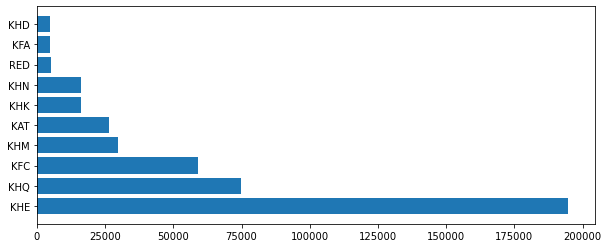

In [23]:
# top 10 entry_channel más usados
entry_channel_value_counts = commercial_activity_df['entry_channel'].value_counts()

entry_channel_value_counts = entry_channel_value_counts.sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=[10,4])
ax.barh(entry_channel_value_counts.index, entry_channel_value_counts[:])
plt.show()

In [24]:
# Obtener categorias segment 
segment_cats = commercial_activity_df['segment'].unique()
display(segment_cats)

print("Numero de categorias 'segment': {}".format(segment_cats.shape[0]))

array(['02 - PARTICULARES', 'Sin Asignar', '01 - TOP',
       '03 - UNIVERSITARIO'], dtype=object)

Numero de categorias 'segment': 4


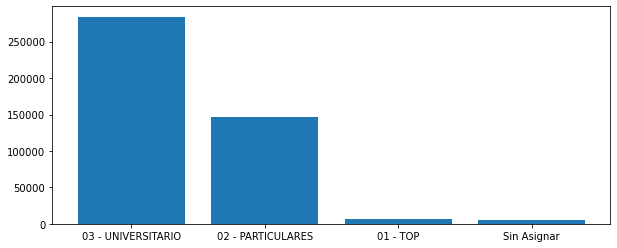

In [25]:
# Segments más usados

segment_value_counts = commercial_activity_df['segment'].value_counts()

segment_value_counts = segment_value_counts.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=[10,4])
ax.bar(segment_value_counts.index, segment_value_counts[:])
plt.show()

Se puede observar como hay categorias NaN. De todas maneras convertimos la columna a category. Más adelante, realizaremos una limpieza y decidiremos qué hacer con los NaNs en la columna de *segment*. 

En la siguiente figura se puede ver el numero de cuentas que corresponden a cada una de las categorias. Antes se ha asignado la categoria NaN como 'Sin Asignar' para que así aparezca en la figura.

**¿Qué realizamos con las categorias sin asignar?**

#commercial_activity_df['entry_channel'] = commercial_activity_df['entry_channel'].astype('category')
#assert commercial_activity_df['entry_channel'].dtype == 'category'

In [26]:
# Si menospreciamos 'Sin Asignar' tanto en segment como en 'entry_channel'
print('Dataframe con los NaNs:')
print(commercial_activity_df.shape)

print('Dataframe sin los NaNs de entry_channel:')
new_commercial_activity_df = commercial_activity_df[(commercial_activity_df['entry_channel'] != 'Sin Asignar')]
print(new_commercial_activity_df.shape)

print('Dataframe sin los NaNs de segment:')
new_commercial_activity_df = commercial_activity_df[(commercial_activity_df['segment'] != 'Sin Asignar')]
print(new_commercial_activity_df.shape)

print('Dataframe sin los NaNs de ambos:')
new_commercial_activity_df = commercial_activity_df[ (commercial_activity_df['entry_channel'] != 'Sin Asignar') & (commercial_activity_df['segment'] != 'Sin Asignar') ]
print(new_commercial_activity_df.shape)

Dataframe con los NaNs:
(442995, 6)
Dataframe sin los NaNs de entry_channel:
(438486, 6)
Dataframe sin los NaNs de segment:
(438379, 6)
Dataframe sin los NaNs de ambos:
(438349, 6)


Deshacerse de las filas en las que *entry_channel* o *segment* es nulo representa tan sólo el 1% de todas las filas. Por lo que se considera, que es un mal menor y deshacerse de estas filas es un paso correcto.

In [27]:
commercial_activity_df.shape[0] - new_commercial_activity_df.shape[0]
(commercial_activity_df.shape[0]-new_commercial_activity_df.shape[0])/commercial_activity_df.shape[0]*100

1.0487703021478798

In [28]:
commercial_activity_df = commercial_activity_df[ (commercial_activity_df['entry_channel'] != 'Sin Asignar') & (commercial_activity_df['segment'] != 'Sin Asignar') ]
print(commercial_activity_df.isna().sum())

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64


Convertir las variables *entry_channel* y *segment* a category.

In [29]:
commercial_activity_df['entry_channel'] = commercial_activity_df['entry_channel'].astype('category')
commercial_activity_df['segment'] = commercial_activity_df['segment'].astype('category')

assert commercial_activity_df['entry_channel'].dtype == 'category'
assert commercial_activity_df['segment'].dtype == 'category'

De la variable de *active_customers* (variable boolean) se puede obtener los usuarios activos. Pero, ¿existe una fila para cada usuario, o un usuario puede aparecer en varios filas? Si la segunda opción es la verdadera para poder visualizar los usuarios activos (más recientes) habría que agrupar por usuario y quedarse con el valor de fila que tenga la fecha más reciente a la actual. 

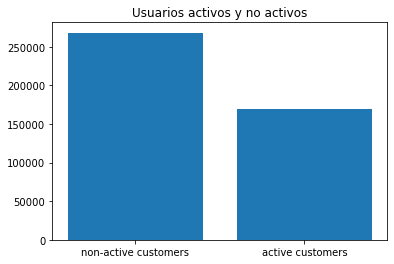

In [30]:
active_customers = commercial_activity_df['active_customer'].value_counts()

fig, ax = plt.subplots(figsize=[6,4])
ax.bar(['non-active customers','active customers'], active_customers[:] )
ax.set_title('Usuarios activos y no activos')
plt.show()

### Preparación de las variables fecha 
- Pasar las variables pk_partition y entry_date a 'date'
    - Añadir variables de año, mes, dia, dia de la semana, año-mes

In [ ]:
from datetime import datetime as dt
# 2015-02-29 = esta fecha no existe!

wrong_dates = {'2015-02-29': '2015-02-28', '2019-02-29':'2019-02-28'}
commercial_activity_df['entry_date'] = commercial_activity_df['entry_date'].replace(wrong_dates)

commercial_activity_df['entry_date'] = pd.to_datetime(commercial_activity_df['entry_date'], format='%Y-%m-%d')

commercial_activity_df['pk_partition'] = commercial_activity_df['pk_partition'].replace(wrong_dates)

commercial_activity_df['pk_partition'] = pd.to_datetime(commercial_activity_df['pk_partition'], format='%Y-%m-%d')

In [ ]:
commercial_activity_df['pk_partition_year'] = commercial_activity_df.pk_partition.dt.year
commercial_activity_df['pk_partition_month'] = commercial_activity_df.pk_partition.dt.month
commercial_activity_df['pk_partition_day'] = commercial_activity_df.pk_partition.dt.day
commercial_activity_df['pk_partition_dayofweek'] = commercial_activity_df.pk_partition.dt.dayofweek
commercial_activity_df['pk_partition_year_month'] = commercial_activity_df.pk_partition.dt.strftime('%Y-%m')

commercial_activity_df['entry_date_year'] = commercial_activity_df.entry_date.dt.year
commercial_activity_df['entry_date_month'] = commercial_activity_df.entry_date.dt.month
commercial_activity_df['entry_date_day'] = commercial_activity_df.entry_date.dt.day
commercial_activity_df['entry_date_dayofweek'] = commercial_activity_df.entry_date.dt.dayofweek
commercial_activity_df['entry_date_year_month'] = commercial_activity_df.entry_date.dt.strftime('%Y-%m')

#df['order_purchase_date'] = df.order_purchase_timestamp.dt.date
#df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
#df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
#df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
#df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
#df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
#df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
#df['order_count']=1
#df['year_month'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')